# CS345 Excercise 2

Univariate and Bivariate Linear Regression using a Example Problem Generator.
In this excercise you will be creating multiple instances of univariate and Bivariate linear regression problems. 
Key to understanding this excercise is understand the meaning of multiple problem instances defined here. Let us assume we have the true linear relationship between an observable $y$ and independent variable $\mathbf{x}$


$$
{y} = w_1x_1 + w_2x_2 + b = \mathbf{w}^\top \mathbf{x} + b
$$


Now, using the abilitly to create random (Guassian) noise we will create multiple instances of problems where our sample data comes from the process

$$
\hat{y} = {y} +  \mathcal{N}(0,\,\sigma^{2})
$$

Where $ \mathcal{N}(\mu,\,\sigma^{2}) $ is a random draw from a Gaussian random variable with mean $0$ and standard deviation $\sigma$.

Then, we multiple instances of problems where the exact noise added changes, the goal here is to see a sampling of regression solutions. 

Last Update 11/09/2021

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

##  Regression Problem Generator

The goal of this excercise is to create multiple regression problems, where the the underlying function will be changed based on the changing of coeficient vector $\mathbf{w}$, intercept $b$ and feature vector $\mathbf{x}$.


To make your work easier and also keep us all on the same page (so to speak) here are key global variables that will drive your code below. 

- `samples_n` The number of sample points in each problem.
- `x_seed_val` The random seeds to initialize default ring before created $\mathbf{x}$ samples for problems.
- `mw` The coeficient for the true linear function $y = \mathbf{mw}^\top \mathbf{x} + mb$
- `mb` The intercept for the true linear function $y = \mathbf{mw}^\top \mathbf{x} + mb$
- `sigma` The standard deviation of the noise added to each sample, i.e. $y = \mathbf{mw}^\top \mathbf{x} + mb +  \mathcal{N}(0,\,\sigma^{2})$
- `x_min` The lower bound where the function $y$ will be sampled, will be fixed at $x_{min} = 0$
- `x_max` The upper bound where the function $y$ will be sampled, will be fixed at $x_{max} = 50$
- `noise_seed`The random seeds to initialize default ring before creating extra random (Guassian) noise.
- `seed_num` The number of instances for each regression problems
- `seed_min` The lowest integer in the range of seed values to initialize noise for each problem.

**Enter Code**

Generate `samples_n` independent variable $x$ instances on the interval $0$ to $50$. These must be sampled from a uniform random variable coming from the default ring using the seed `x_seed_val`. 

To be more specific, write a new function `gen_x_vals` that takes the number of samples and the random seed as arguments and returns the $x$ values.

One more thing, please read up on [np.round](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.round.html#numpy.ndarray.round) and avoid needless precision. Specifically, round your $x$ value to $1$ decimal places. To be clear, were we generating hundreds of samples this degree of rounding would be a bad idea, but when working an excercise, it is actually helpful in so much as the numbers are much easier to radiply scan.  If you want to think about further about this issue, consider how many different values total between $0$ and $50$ we can have using this degree of rounding.

In [12]:
# Enter Code 

def gen_x_vals(n, seed) :
  rng = np.random.default_rng(seed = seed)
  arr = rng.random((n,)) * 50
  return np.round(arr, decimals = 1)


## Part1

In part1, you are going to play with 1-D regression problem from scratch with modest noise. 

In [13]:
#Global key variables
samples_n1  = 64
x_seed_val1 = 6
mw1    =  3
mb1    = -5
sigma1 = 10.0
x_min = 0
x_max = 50
shuffle_seed1 = 9

**Run code** 

Run the code in cell below, you are going to generate independent variable $x$ on the interval $0$ to $50$ with number of samples_n. 

In [14]:
#Run Code#

x_val1 = gen_x_vals(samples_n1, x_seed_val1)
x_val1 = np.array(x_val1)
print(f'x values: {x_val1[:10]}')

x values: [26.9 17.2 18.5 18.7 49.4 31.6 33.7 16.5 34.   6.1]


**Enter Code**

Define a new function `generate_single_1D_regression_problem` that will generate single instance of regression problem based on the underlying functions:

$$
{y} =  {y} = w_1x_1 + b
$$

$$
\hat{y} = {y} +  \mathcal{N}(0,\,\sigma^{2})
$$

Your function must return two different things:
- The true $y$ values of the function without noise
- The list of noise $y$
  
Keep in mind the key to this problem generator is adding Gaussian (normal) noise to the true $y$ values. 
You may want to review 
[standard_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) 
and play with it until you are comfortable with what it is doing.

In [15]:
# Enter Code 

def generate_single_1D_regression_problem(x_val, samples_n, mw, mb, sigma, shuffle_seed) :
  rng = np.random.default_rng(seed = shuffle_seed)
  y_list = [ x * mw + mb for x in x_val]  
  noise = sigma * rng.standard_normal(size = (samples_n,))
  y_Noise = y_list + noise  
  return y_list, y_Noise 

In [16]:
# run Code

y1, ylst1 = generate_single_1D_regression_problem(x_val1, samples_n1, mw1, mb1, sigma1, shuffle_seed1)

**Enter Code**

Now define a function `run_regression_1D_on_single_example` that takes two required arguments

- `x` The $x$ values of the data samples
- `y_lst` The list of noise $y$ values 

This function returns five things

- `model_w` Coefficent $w$ fit by the regresion for single 1-D problem
- `model_b` Intercept $b$ fit by the regresion for single 1-D problem
- `y_pred_lst` The predicted $y$ values from regression
- `mse` Mean square error from the regression predictions for single 1-D problem 
- `r2` The coefficient of determination regression score, you may to take a look at [$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) to play with it

Please only keep $3$ digits of precision with the $w$, $b$, `mse`, and `r2` values.



In [17]:
# Enter Code 
def run_regression_1D_on_single_example(x, ylst) :
  linreg = LinearRegression()
  linreg.fit(x.reshape(-1,1),ylst)
  w = linreg.coef_
  b = linreg.intercept_
  pred = linreg.predict(x.reshape(-1,1))
  mse = mean_squared_error(pred, ylst, squared= False)
  r2 = r2_score(ylst, pred)

  return np.round(w, decimals = 3), np.round(b, decimals = 3), np.round(pred, decimals = 3), np.round(mse, decimals = 3), np.round(r2, decimals = 3)

  


**Run Code**

In the next cell, run your function `run_regression_1D_on_single_example`.

In [18]:
#Run Code 
mods_w1, mods_b1, yp1, mse1, r21 = run_regression_1D_on_single_example(x_val1, ylst1)
print(f'coefficients values: mw is {mods_w1}, mb is {mods_b1}')
print(f'mse value is {mse1}, r2 value is {r21}')

coefficients values: mw is [3.111], mb is -8.43
mse value is 10.034, r2 value is 0.956


**Enter Code**

In preparation for doing a test plot, it is handy to have a function which will generate $100$ evenly sampled pairs of $x$ and $y$ values for given coefficents. 

Here write this function `gen_100`. The run code cell below will show you exactly what argmuments are expected to be provided to `gen_100`.

Please avoid needless precision in this generation of $x$ and $y$ values by rounding all values to $3$ decimal places.

In [19]:
# Enter Code 

def gen_100(x_min, x_max, mw, mb) :
  x_hun = np.arange(x_min, x_max+0.001, x_max/99)
  y_hun = x_hun*mw  + mb
  return np.round(x_hun, decimals= 3), np.round(y_hun, decimals = 3)


**Run Code**

The code below shows you the arguments to give your function `gen_100`. 

In [20]:
# Run Code 

x_100, y_100 = gen_100(x_min, x_max, mods_w1, mods_b1)
print(f'X values {x_100[:3]} ... {x_100[-3:]}')
print(f'Y values {y_100[:3]} ... {y_100[-3:]}')

X values [0.    0.505 1.01 ] ... [48.99  49.495 50.   ]
Y values [-8.43  -6.859 -5.288] ... [143.978 145.549 147.12 ]


**Run Code**

The code below provides you with the functionality to plot the first problem's data along with the predicted function. Use this to test what you have constructed so far.

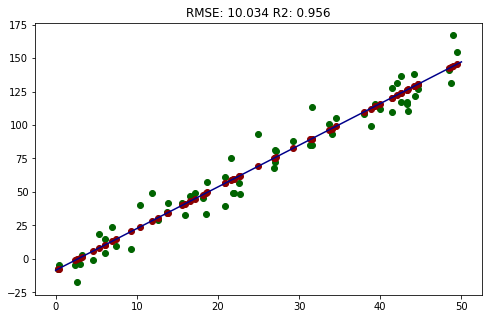

In [21]:
# Run Code

def plot_first_problem(x, y_noise, yp, x_100, y_100, mse, r2) :
  title = 'RMSE: {:4.3f} R2: {:4.3f}'.format( mse, r2)
  plt.figure(figsize=(8,5))
  plt.scatter(x, y_noise, c = 'darkgreen')
  plt.scatter(x, yp, c= 'darkred')
  plt.plot(x_100, y_100, c = 'darkblue')

  plt.title(title)


plot_first_problem(x_val1, ylst1, yp1, x_100, y_100, mse1, r21)

## Part 2


Now we are going to expand our single linear regression problem to multiple distinct instances of a linear regression problems where the underlying function as well as the $x$ samples remain fixed.  To say this another way, all that is changing is the Guassian noise being added to each sample.  


In [22]:
# Key Global Vairiables
samples_n2  = 32
x_seed_val2 = 6
mw2    =  3
mb2    = -5
sigma2 = 10.0
x_min = 0
x_max = 50
shuffle_seed2  = 9
seed_min2 = 10
seed_num2 = 32

**Enter Code**
 
Write a function ```gen_seeds``` which takes three arguments.  The first is the number of seeds to generate. The second is the smallest integer seed in the list array being returned. Finally, the third argument is the seed for the shuffling operation, which will be set to `shuffle_seed` when this function is used.

To be a bit more precise about the nature of the sequence of integers (seeds), you will want to create a sequence of integers containing exactly `seed_num` elements . Moroever, the sequence should start with the integer `seed_min`. 

Then,  randomize the seeds by shuffling this original sequence. You will find reading up on [shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html) helpful.
 
And to be clear, like with the other randomization features we have been using, please create a new instance of the default ring using the seed value `shuffle_seed` before shuffling. 

In [23]:
# Enter Code 

def gen_seeds(n, min_i, seed) :
  rng = np.random.default_rng(seed = seed)
  arr = np.arange(n) + min_i
  rng.shuffle(arr)
  return arr


**Run Code**

Run the code below and you should get the same result as shown

In [24]:
# Run Code

seed_list = gen_seeds(seed_num2, seed_min2, shuffle_seed2)
print(f'Seeds are: {seed_list}')

Seeds are: [25 12 19 29 23 35 31 24 16 27 36 13 32 17 37 28 26 38 30 33 20 18 39 22
 15 41 34 21 14 10 40 11]


**Run Code** 

Run the code in cell below, you are going to generate samples_n independent variable $x$ instances on the interval $0$ to $50$. 

In [25]:
## Run Code

x_val2 = gen_x_vals(samples_n2, x_seed_val2)
x_val2 = np.array(x_val2)
print(f'x values: {x_val2[:10]}')

x values: [26.9 17.2 18.5 18.7 49.4 31.6 33.7 16.5 34.   6.1]


**Enter Code**

Define a new function `generate_multiple_1D_regression_problems` that will generate multipe instances of regression problems for the same underlying function $y = mw * x + mb +  \mathcal{N}(0,\,\sigma^{2})$ . 

Your function must return two different things:
- The true $y$ values of the function without noise
- The list of noise $y$ samples for each problem instance

In [26]:
# Enter Code

def generate_multiple_1D_regression_problems(x_val, samples_n,shuffle_seed, seed_num, seed_min, mw, mb, sigma) :
  sample_seeds = gen_seeds(seed_num, seed_min, shuffle_seed)
  y_list = [ x * mw + mb for x in x_val]  
  y_Noise = np.zeros((32,32))
  for i in range (len(sample_seeds)):
    rng = np.random.default_rng(seed = sample_seeds[i])
    noise = sigma * rng.standard_normal(size = (samples_n,))
    y_Noise[i] = y_list + noise 
  return y_list, y_Noise


**Run Code**

Run the code below to generate your sample_n distinct instances of your 1-D linear regression problems.

In [27]:
# Run Code

y2, ylst2 = generate_multiple_1D_regression_problems(x_val2, samples_n2, shuffle_seed2, seed_num2, seed_min2, mw2, mb2, sigma2)


**Enter Code**

Now define a function `run_multiple_1D_regression_problems` that takes two required arguments

- `x` The $x$ values of the data samples
- `y_lst` The list of $y$ values for each of the problems generated above.

This function returns five things

- `model_ws` A list of the coefficents $w$ fit by the regresion for each instance
- `model_bs` A list of the intercepts $b$ fit by the regresion for each instance
- `y_pred_lst` A list of arrays, each array contains the predicted $y$ values from regression
- `mse` A list of mean square errors for the regression predictions for each instance
- `r2` A list of coefficient of determination regression scores for each instance

Please only keep $3$ digits of precision with the $w$, $b$ and `mse` values.

In [28]:
# Enter Code 

def run_multiple_1D_regression_problems(x, ylst) :
  model_ws = np.zeros((len(x),))
  model_bs = np.zeros((len(x),))
  mse = np.zeros((len(x),))
  r2 = np.zeros((len(x),))
  y_pred_lst = np.zeros((len(ylst),len(ylst)))

  for i in range(len(ylst)):
    mods_w2, mods_b2, yp2, mse2, r22 = run_regression_1D_on_single_example(x, ylst[i])
    model_ws[i] = mods_w2
    model_bs[i] = mods_b2
    mse[i] = mse2
    r2[i] = r22
    y_pred_lst[i] = yp2

  return np.round(model_ws, decimals = 3), np.round(model_bs, decimals = 3), np.round(y_pred_lst, decimals = 3), np.round(mse, decimals = 3), np.round(r2, decimals = 3)


**Run Code**

In the next cell, run your function `run_multiple_1D_regression_problems`.

In [29]:
# Run Code

mods_w2, mods_b2, y_fitlst2, mse2, r22 = run_multiple_1D_regression_problems(x_val2,  ylst2)

**Run Code**

Run cell below to print out the mean and standard deviation of the coefficient estimates along with with true values

In [30]:
# Run Code 

print(f'Ture coefficient w is {mw2}, and b is {mb2}\n')

print(f'Mean of coefficient w is {np.round(np.mean(mods_w2),3)}, Mean of coefficient b is {np.round(np.mean(mods_b2), 3)}\n')

print(f'Standard deviation of coefficients w is {np.round(np.std(mods_w2), 3)}, standard deviation of coefficients b is {np.round(np.std(mods_b2), 3)}')

Ture coefficient w is 3, and b is -5

Mean of coefficient w is 3.028, Mean of coefficient b is -5.814

Standard deviation of coefficients w is 0.112, standard deviation of coefficients b is 2.939


**Enter code**

Now create your own function which enalbles you to histogram your histogram the recovered coefficients.

In [31]:
# Enter code

def hist_coeficient(vals, nbins, fname, bincolor) :
  plt.figure(figsize=(6,4))
  plt.hist(vals,
           bins = nbins,
           color = bincolor,
           density = True,
           edgecolor ='black')
  plt.xlabel(fname)
  plt.ylabel('Feature Density')


**Run Code**

Run the following two cells to draw the histogram of your recovered lists of $mw$ and $mb$.

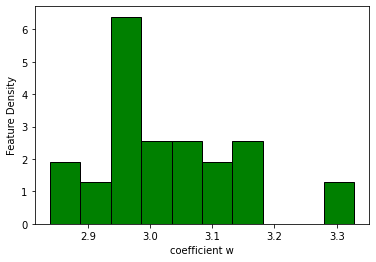

In [32]:
# Run code 
hist_coeficient(mods_w2, 10, 'coefficient w', 'green')

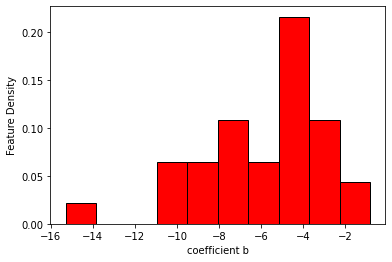

In [33]:
# Run code 
hist_coeficient(mods_b2, 10, 'coefficient b', 'red')

**Enter code**

Now turn up the noise by increasing the sigma to 100 and then repeat the previous steps. Then genete the new list of regression problems and related recovered $wm$ and $wb$.

In [34]:
# Enter code

y2, ylst2 = generate_multiple_1D_regression_problems(x_val2, samples_n2, shuffle_seed2, seed_num2, seed_min2, mw2, mb2, 100)
mods_wl, mods_bl, y_fitlst2, mse2, r22 = run_multiple_1D_regression_problems(x_val2,  ylst2)


**Run Code**

Run cell below to print out the mean and standard deviation of the coefficient estimates along with with true values when the extra noise is larger then before.

In [35]:
# Run code 
print(f'Ture coefficient w is {mw2}, and b is {mb2}\n')

print(f'Mean of coefficient w is {np.round(np.mean(mods_wl),3)}, Mean of coefficient b is {np.round(np.mean(mods_bl), 3)}\n')

print(f'Standard deviation of coefficients w is {np.round(np.std(mods_wl), 3)}, standard deviation of coefficients b is {np.round(np.std(mods_bl), 3)}')

Ture coefficient w is 3, and b is -5

Mean of coefficient w is 3.275, Mean of coefficient b is -13.141

Standard deviation of coefficients w is 1.123, standard deviation of coefficients b is 29.392


**Run code**

Run the following two cells to draw the histogram of your recovered lists of $mw$ and $mb$.

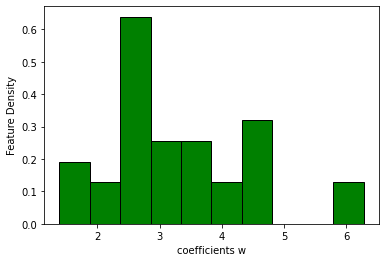

In [36]:
# Run code 

hist_coeficient(mods_wl, 10, 'coefficients w', 'green')

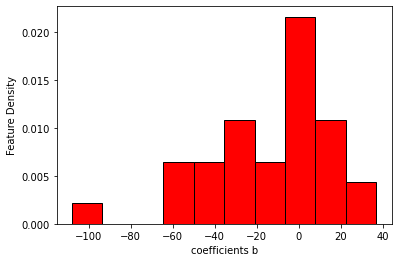

In [37]:
# Run code 

hist_coeficient(mods_bl, 10, 'coefficients b', 'red')

**Enter code**

Now turn down the noise by decreas the sigma to 1 and then repeat the previous steps. Then genete the new list of regression problems and related recovered $wm$ and $wb$.


In [38]:
# Enter code

y3, ylst3 = generate_multiple_1D_regression_problems(x_val2, samples_n2, shuffle_seed2, seed_num2, seed_min2, mw2, mb2, 1)
mods_ws, mods_bs, y_fitlst2, mse2, r22 = run_multiple_1D_regression_problems(x_val2,  ylst3)

**Run Code**

Run cell below to print out the mean and standard deviation of the coefficient estimates along with with true values when the extra noise is larger then before.

In [39]:
# Run Code 
print(f'Ture coefficient w is {mw2}, and b is {mb2}\n')

print(f'Mean of coefficient w is {np.round(np.mean(mods_ws),3)}, Mean of coefficient b is {np.round(np.mean(mods_bs), 3)}\n')

print(f'Standard deviation of coefficients w is {np.round(np.std(mods_ws), 3)}, standard deviation of coefficients b is {np.round(np.std(mods_bs), 3)}')

Ture coefficient w is 3, and b is -5

Mean of coefficient w is 3.003, Mean of coefficient b is -5.081

Standard deviation of coefficients w is 0.011, standard deviation of coefficients b is 0.294


**Run Code**

Run the following two cells to draw the histogram of your recovered lists of $mw$ and $mb$.

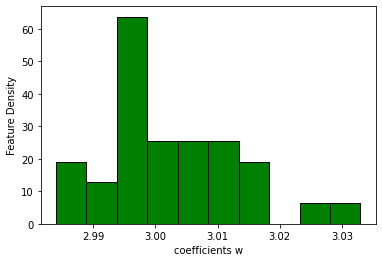

In [40]:
# Run Code 

hist_coeficient(mods_ws, 10, 'coefficients w', 'green')

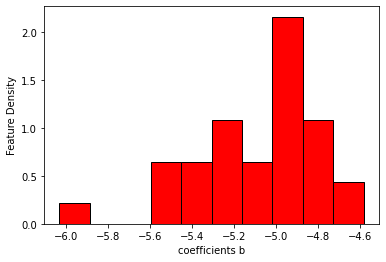

In [41]:
# Run Code 

hist_coeficient(mods_bs, 10, 'coefficients b', 'red')

## Part 3

Now it's time to play with Bivariate Linear Regression Problem. Same as before, you need cearte your sample instaces at first.

In [42]:
# key global variables
samples_n3  = 128
x_seed_val3 = [6, 15]
mw3    =  [3, 7]
mb3    = -3
sigma3 = 10.0
x_min = 0
x_max = 50
shaffle_seed3 = 9

**Run Code** 

Run the code in cell below, you are going to generate the independent variables $x_1$ and $x_2$ on the interval $0$ to $50$, each contaisn sample_n points


In [43]:
#Run Code

x_val3 = []
for s in x_seed_val3:
    current = gen_x_vals(samples_n3, s)
    x_val3.append(current)
x_val3 = np.array(x_val3).T
print(f'x values: {x_val3[0]}')

x values: [26.9 34.6]


**Enter Code**

Define a new function `generate_single_2D_regression_problem` that will generate single instance of regression problem based on the underlying functions:

$$
{y} =  {y} = w_1x_1 + w_2x_2 + b
$$

$$
\hat{y} = {y} +  \mathcal{N}(0,\,\sigma^{2})
$$

Your function must return two different things:
- The true $y$ values of the function without noise
- The list of noise $y$
  

In [44]:
# Enter Code

def generate_single_2D_regression_problem(x_val, samples_n, shaffle_seed, mw, mb, sigma) :
  rng = np.random.default_rng(seed = shaffle_seed)
  y_list = [x[0]*mw[0] + x[1]*mw[1] + mb for x in x_val]
  noise = sigma * rng.standard_normal(size = (samples_n,))
  y_Noise = y_list + noise
  return y_list, y_Noise


**Run Code**

Run code below to generate the sample points of your single 2D linear regression problem.

In [45]:
#Run Code
y3, ylst3 = generate_single_2D_regression_problem(x_val3, samples_n3, shaffle_seed3, mw3, mb3, sigma3)

**Enter Code**

Now define a function `run_regression_2D_on_single_example` that will return five things

- `model_ws` Coefficent $w$ fit by the regresion for single 2-D problem
- `model_bs` Intercept $b$ fit by the regresion for single 2-D problem
- `y_pred_lst` The predicted $y$ values from regression
- `mse` Mean square error from the regression predictions for single 2-D problem 
- `r2` The coefficient of determination regression score.

Please only keep $3$ digits of precision with the $w$, $b$ and `mse` values.

In [46]:
# Enter Code

def run_regression_2D_on_single_example(x, ylst) :
  linreg = LinearRegression()
  linreg.fit(x,ylst)
  w = linreg.coef_
  b = linreg.intercept_
  pred = linreg.predict(x)
  mse = mean_squared_error(pred, ylst, squared= False)
  r2 = r2_score(ylst, pred)
  # print(pred)

  return np.round(w, decimals = 3), np.round(b, decimals = 3), np.round(pred, decimals = 3), np.round(mse, decimals = 3), np.round(r2, decimals = 3)

  

**Run Code**

In the next cell, run your function `run_regression_2D_on_single_example`.

In [47]:
# Run Code

mods_w3, mods_b3, yp3, mse3, r23 = run_regression_2D_on_single_example(x_val3, ylst3)
print(f'Ture coefficient w is {mw3}, and b is {mb3}\n')
print(f'coefficients values: mw is {mods_w3}, mb is {mods_b3}')
print(f'mse value is {mse3}, r2 value is {r23}')

Ture coefficient w is [3, 7], and b is -3

coefficients values: mw is [3.022 7.047], mb is -4.678
mse value is 10.392, r2 value is 0.991


**Run Code**

The code below provides you with the functionality to plot the 2-D's data along with the true function. Use this to test what you have constructed so far.

<IPython.core.display.Javascript object>


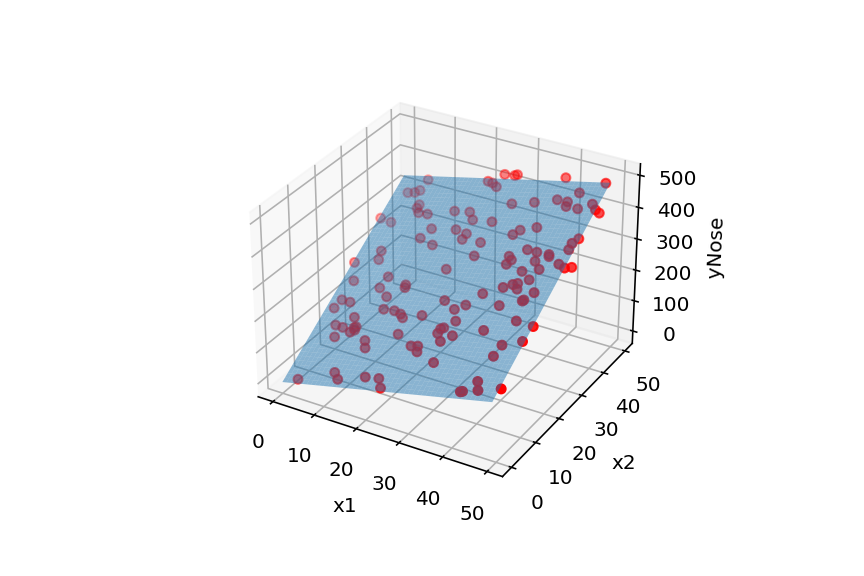

In [48]:
# Run Code

%matplotlib notebook

def plot_2D_regression(x_val, ylst, mods_w,mods_b) :
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    xx, yy = np.meshgrid(range(50), range(50))
    ax.scatter(x_val[:,0], x_val[:,1], ylst, marker='o', color= 'red')
    zz = mods_w[0] * xx + mods_w[1] * yy + mods_b
    ax.plot_surface(xx, yy, zz, alpha=0.5)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('yNose ')

plot_2D_regression(x_val3, ylst3, mods_w3, mods_b3)  

**Enter Code**

Define a new function `generate_multiple_2D_regression_problems` that will generate multipe instances of regression problems for the same underlying function $y = \mathbf{mw}^\top \mathbf{x} + mb +  \mathcal{N}(0,\,\sigma^{2})$. 

Your function must return two different things:
- The true $y$ values of the function without noise
- The list of noise $y$ samples for each problem instance

In [49]:
# Enter Code

def generate_multiple_2D_regression_problems(x_val, samples_n, shuffle_seed, seed_num, seed_min, mw, mb, sigma) :
  y_list = [x[0]*mw[0] + x[1]*mw[1] + mb for x in x_val]
  y_Noise = np.zeros((samples_n, len(y_list)))
  sample_seeds = gen_seeds(seed_num, seed_min, shuffle_seed)


  for i in range (len(sample_seeds)):
    rng = np.random.default_rng(seed = sample_seeds[i])
    noise = sigma * rng.standard_normal(size = (samples_n, ))
    y_Noise[i] = y_list + noise 

  return y_list, y_Noise


In [50]:
# Key Globel Varibles

samples_n4  = 32
x_seed_val4 = [8, 12]
mw4    =  [3, 7]
mb4    = -3
sigma4 = 10.0
x_min = 0
x_max = 50
shuffle_seed4  = 9
seed_min4 = 10
seed_num4 = 32

**Run Code**

Run code below to create your new list of sample points for $x_1$ and $x_2$ with the following key globel varibales.


In [51]:
# Run Code

x_val4 = []
for s in x_seed_val4:
    current = gen_x_vals(samples_n4, s)
    x_val4.append(current)
x_val4 = np.array(x_val4).T
print(f'x values: {x_val4[0]}')

x values: [16.3 12.5]


**Run code**

Run the code below to generate your sample_n distinct instances of your 2-D linear regression problems.

In [52]:
# Run Code

y4, ylst4 = generate_multiple_2D_regression_problems(x_val4, samples_n4, shuffle_seed4, seed_num4, seed_min4, mw4, mb4, sigma4) 

**Enter Code Cell 12**

Now define a function `run_multiple_2D_regression_problems` that takes two required arguments

- `x` The $x$ values of the data samples
- `y_lst` The list of $y$ values for each of the problems generated above.

This function returns five things

- `model_ws` A list of the coefficents $w$ fit by the regresion for each instance
- `model_bs` A list of the intercepts $b$ fit by the regresion for each instance
- `y_pred_lst` A list of arrays, each array contains the predicted $y$ values from regression
- `mse` A list of mean square errors for the regression predictions for each instance
- `r2` A list of coefficient of determination regression scores for each instance
Please only keep $3$ digits of precision with the $w$, $b$ and `mse` values.

In [53]:
# Enter Code

def run_regression_on_2D_multiple_examples(x, ylst) :
  w = np.zeros((len(x),2))
  b = np.zeros((len(x),2))
  mse = np.zeros((len(x),2))
  r2 = np.zeros((len(x),2))
  pred = np.zeros((len(ylst),len(ylst)))

  for i in range(len(ylst)):
    mods_w, mods_b, yp, ms, r = run_regression_2D_on_single_example(x,ylst[i])
    w[i] = mods_w
    b[i] = mods_b
    mse[i] = ms
    r2[i] = r 
    pred[i] = yp

  return np.round(w, decimals = 3), np.round(b, decimals = 3), np.round(pred, decimals = 3), np.round(mse, decimals = 3), np.round(r2, decimals = 3)

   

In [54]:
# Run Code

mods_w4, mods_b4, y_fitlst4, mse4, r24 = run_regression_on_2D_multiple_examples(x_val4, ylst4)

In [55]:
# Run Code

# print(mods_w4)

print(f'Ture coefficient w is {mw4}, and b is {mb4}\n')

print(f'mean of coefficients w is {np.round(np.mean(mods_w4, 0),3)}, mean of coefficients b is {np.round(np.mean(mods_b4), 3)}\n')

print(f'Standard deviation of coefficients w is {np.round(np.std(mods_w4, 0), 3)}, standard deviation of coefficients b is {np.round(np.std(mods_b4), 3)}')

Ture coefficient w is [3, 7], and b is -3

mean of coefficients w is [3.011 6.987], mean of coefficients b is -3.055

Standard deviation of coefficients w is [0.155 0.098], standard deviation of coefficients b is 4.535


## Part 4

In Part3, we have generated two indepent variables $x_1$ and $x_2$. Now just use `gen_x_val` function to generate single indepent variables $x_1$ with number of `sample_n`, then the another varibale $x_2$ will be genereted based on following function:
$$
x_2 = 1.1 * x_1
$$

And in this part, if your already generated the required functions propriately, most of your jobs are to run the code cell.

In [56]:
# Key Globel variable 
samples_n5  = 128
x_seed_val5 = 6
mw5    =  [3, 7]
mb5    = -3
sigma5 = 10.0
x_min = 0
x_max = 50
shaffle_seed5 = 9

**Enter Code**

In cell below, write your code to generate variables $x_1$ and $x_2$.

In [57]:
# Enter Code
x1_val5 = gen_x_vals(samples_n5, x_seed_val5)
x2_val5 = x1_val5 * 1.1
x_val5 = np.vstack((x1_val5, x2_val5))
x_val5 = np.array(x_val5).T
print(f'x values: {x_val5[0]}')


x values: [26.9  29.59]


**Run Code**

In [58]:
#Run Code

y5, ylst5 = generate_single_2D_regression_problem(x_val5, samples_n5, shaffle_seed5, mw5, mb5, sigma5)

mods_w5, mods_b5, yp5, mse5, r25 = run_regression_2D_on_single_example(x_val5, ylst5)
print(f'Ture coefficient w is {mw5}, and b is {mb5}\n')
print(f'coefficients values: mw is {mods_w5}, mb is {mods_b5}\n')
print(f'mse value is {mse5}, r2 value is {r25}\n')

Ture coefficient w is [3, 7], and b is -3

coefficients values: mw is [4.853 5.338], mb is -3.537

mse value is 10.412, r2 value is 0.996



**Run code**

<IPython.core.display.Javascript object>


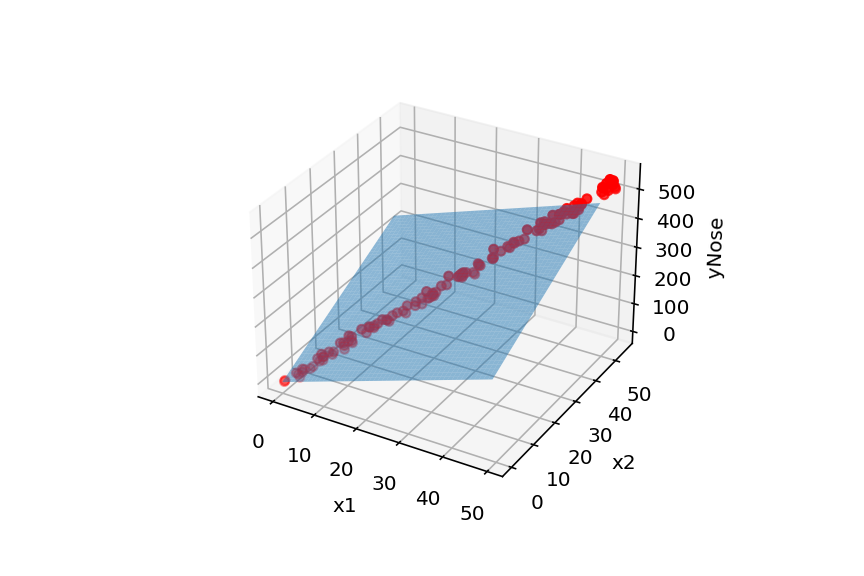

In [59]:
# Run code
plot_2D_regression(x_val5, ylst5, mods_w5, mods_b5)  

In [60]:
# Key global variables 
samples_n6  = 32
x_seed_val6 = [6, 15]
mw6    =  [3, 7]
mb6    = -3
sigma6 = 10.0
x_min = 0
x_max = 50
shuffle_seed6  = 9
seed_min6 = 10
seed_num6 = 32

**Enter code**

In cell below, write your code to generate variables $x_1$ and $x_2$ based the new `sample_n6`.
 

In [61]:
# Enter code 
x1_val6 = gen_x_vals(samples_n6, x_seed_val6[0])
x2_val6 = x1_val6 * 1.1

x_val6 = np.vstack((x1_val6, x2_val6))
x_val6 = np.array(x_val6).T
print(f'x values: {x_val6[0]}')

x values: [26.9  29.59]


**Run Code**

In [62]:
# Run Code 

y6, ylst6 = generate_multiple_2D_regression_problems(x_val6, samples_n6, shuffle_seed6, seed_num6, seed_min6, mw6, mb6, sigma6) 

mods_w6, mods_b6, y_fitlst6, mse6, r26 = run_regression_on_2D_multiple_examples(x_val6, ylst6)

print(f'Ture coefficient w is {mw2}, and b is {mb2}\n')

print(f'mean of coefficients w is {np.round(np.mean(mods_w6, 0),3)}, mean of coefficients b is {np.round(np.mean(mods_b6), 3)}\n')

print(f'Standard deviation of coefficients w is {np.round(np.std(mods_w6, 0), 3)}, standard deviation of coefficients b is {np.round(np.std(mods_b6), 3)}')

Ture coefficient w is 3, and b is -5

mean of coefficients w is [4.854 5.34 ], mean of coefficients b is -3.814

Standard deviation of coefficients w is [0.051 0.056], standard deviation of coefficients b is 2.939
